### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Set Directory

In [3]:
os.getcwd

<function nt.getcwd()>

In [4]:
#Set working directory
os.chdir("C:/Users/shilpa pelwar/Downloads/KPMG-CaseStuty/EcommerceAnalytics")


### Read DataSet

In [5]:
df=pd.read_csv("ecom.csv")

C:\Users\shilpa pelwar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,10/29/2017,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,10/5/2017,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,10/12/2017,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,8/22/2017,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,10/10/2017,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [7]:
# change the column names
df.rename(index=str, columns={'CustomerID'       : 'CustomerID',
                              'Item Code'        : 'Item_Code',
                              'InvoieNo'         : 'InvoiceNo',
                              'Date of purchase' : 'Date_of_purchase',
                              'Quantity'         : 'Quantity',
                              'Time'             : 'Time',
                              'price per Unit'   : 'price_per_Unit',
                              'Price'            : 'Revenue',
                              'Shipping Location': 'Shipping_Location',
                              'Cancelled_status' : 'Cancelled_status',
                              'Reason of return' : 'Reason_of_return',
                              'Sold as set'      : 'Sold_as_set'}, inplace=True)

## DATA CLEANING

In [8]:
df.shape

(537979, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item_Code          537979 non-null  object 
 2   InvoiceNo          537979 non-null  int64  
 3   Date_of_purchase   537979 non-null  object 
 4   Quantity           537979 non-null  int64  
 5   Time               537979 non-null  object 
 6   price_per_Unit     537979 non-null  float64
 7   Revenue            537979 non-null  float64
 8   Shipping_Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    float64
 10  Reason_of_return   3 non-null       object 
 11  Sold_as_set        0 non-null       float64
dtypes: float64(5), int64(2), object(5)
memory usage: 53.4+ MB


In [10]:
df.isnull().sum()

CustomerID           133790
Item_Code                 0
InvoiceNo                 0
Date_of_purchase          0
Quantity                  0
Time                      0
price_per_Unit            0
Revenue                   0
Shipping_Location         0
Cancelled_status     529634
Reason_of_return     537976
Sold_as_set          537979
dtype: int64

In [11]:
#Handling Missing Values from CustomerID as its unique value can not be impute.
df = df.dropna(subset=['CustomerID'])

In [12]:
#Data has only float and Object values. As 'Date of purchase' is object type ,we have change them t0 Datetime().
df['Date_of_purchase'] = pd.to_datetime(df['Date_of_purchase'])
df['Time'] = pd.to_datetime(df['Time'])


In [13]:
df.dtypes

CustomerID                  float64
Item_Code                    object
InvoiceNo                     int64
Date_of_purchase     datetime64[ns]
Quantity                      int64
Time                 datetime64[ns]
price_per_Unit              float64
Revenue                     float64
Shipping_Location            object
Cancelled_status            float64
Reason_of_return             object
Sold_as_set                 float64
dtype: object

In [14]:
#Drop featurse
#As few features are mostly empty hence not contribute in decision making.
df =df.drop(['Reason_of_return', 'Sold_as_set','Cancelled_status','price_per_Unit'], axis = 1)

In [15]:
# check duplicates. there are 8 duplicate rows
df.duplicated().sum()

8

In [16]:
# check out rows with missing values
df[df.isnull().any(axis=1)].head()

,CustomerID,Item_Code,InvoiceNo,Date_of_purchase,Quantity,Time,Revenue,Shipping_Location


In [17]:
df = df.drop_duplicates(keep= 'last')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537949
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item_Code          404181 non-null  object        
 2   InvoiceNo          404181 non-null  int64         
 3   Date_of_purchase   404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  datetime64[ns]
 6   Revenue            404181 non-null  float64       
 7   Shipping_Location  404181 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 27.8+ MB


In [19]:
df.describe().round(2)

,CustomerID,InvoiceNo,Quantity,Revenue
count,404181.00,404181.00,404181.00,404181.00
mean,2181.90,385648.27,11.48,2474.14
std,1252.68,13107.40,29.49,4891.39
min,2.00,361429.00,-152.00,-10152.00
25%,1207.00,374194.00,2.00,555.00
50%,2078.00,386937.00,5.00,1572.00
75%,3291.00,397130.00,12.00,2492.00
max,4372.00,406651.00,3186.00,90400.00


## Remove Negative Values

In [20]:
#We count the negative value of  quantity
print("The number of rows with negative Quantity:",sum(n < 0 for n in df.Quantity))

The number of rows with negative Quantity: 8183


In [21]:
df = df[df.Quantity > 0]

In [22]:
df.describe().round(2)

,CustomerID,InvoiceNo,Quantity,Revenue
count,395998.00,395998.00,395998.00,395998.00
mean,2186.42,385683.41,11.82,2554.93
std,1252.33,13107.51,29.67,4903.43
min,2.00,361429.00,1.00,12.00
25%,1212.00,374298.00,2.00,598.00
50%,2080.00,386957.00,6.00,1608.00
75%,3294.00,397157.00,12.00,2520.00
max,4372.00,406651.00,3186.00,90400.00


In [ ]:
#df.iloc[np.where(df["Year"] == 2016) | df["Month"]== 2]
#df.drop('Day',axis=1 ,inplace=True)

In [23]:
df['Year'] = df['Date_of_purchase'].dt.year
df['Month'] = df['Date_of_purchase'].dt.month_name()
df['Day'] = df['Date_of_purchase'].dt.day_name()


In [24]:
df.head()

,CustomerID,Item_Code,InvoiceNo,Date_of_purchase,Quantity,Time,Revenue,Shipping_Location,Year,Month,Day
0,4355.0,15734,398177,2017-10-29,6,2021-12-23 15:36:00,1926.0,Location 1,2017,October,Sunday
1,4352.0,14616,394422,2017-10-05,2,2021-12-23 14:53:00,1740.0,Location 1,2017,October,Thursday
2,4352.0,14614,394422,2017-10-12,2,2021-12-23 14:53:00,1866.0,Location 1,2017,October,Thursday
3,4352.0,85014B,388633,2017-08-22,3,2021-12-23 14:47:00,1869.0,Location 1,2017,August,Tuesday
4,4352.0,15364,394422,2017-10-10,2,2021-12-23 14:53:00,1888.0,Location 1,2017,October,Tuesday


In [25]:
#Count Unique value in all dataset columns
df.nunique()

CustomerID            4324
Item_Code             3637
InvoiceNo            18305
Date_of_purchase       381
Quantity               209
Time                   737
Revenue               8805
Shipping_Location       20
Year                     2
Month                   12
Day                      7
dtype: int64

In [26]:
df.shape

(395998, 11)

## Exploratory Data Analysis (EDA)

orders made by the customers

In [27]:
print("Top 5 customers")
df.groupby(["CustomerID"])['Revenue'].sum().sort_values(ascending=False).head()

Top 5 customers


CustomerID
1704.0    35536194.0
1896.0    18148261.0
56.0      14385095.0
1346.0    12657119.0
3802.0    12367652.0
Name: Revenue, dtype: float64

In [28]:
print("Customers with maximum number of orders")
df.groupby(["CustomerID"])['Quantity'].max().sort_values(ascending=False).head()

Customers with maximum number of orders


CustomerID
1678.0    3186
1305.0    2160
1006.0    1600
1119.0    1500
557.0     1440
Name: Quantity, dtype: int64

In [29]:
print("Customer with maximum Orders")
df.groupby(["CustomerID"])['InvoiceNo'].max().sort_values(ascending=False).head()

Customer with maximum Orders


CustomerID
276.0     406651
588.0     406650
2563.0    406649
1068.0    406648
3855.0    406646
Name: InvoiceNo, dtype: int64

In [30]:
print("Location generate maximum revenue")
df.groupby(["Shipping_Location"])['Revenue'].max().sort_values(ascending=False).head()

Location generate maximum revenue


Shipping_Location
Location 36    90400.0
Location 4     89100.0
Location 14    87552.0
Location 1     87156.0
Location 11    84240.0
Name: Revenue, dtype: float64

## DATA VISUALIZATION

In [ ]:
df.groupby(['Year'])['Revenue'].sum().plot(kind='bar', title='Yearly Sales')

In [ ]:
df.groupby(['Month'])['Revenue'].sum().plot(kind='bar', title='Monthly Sales')

In [ ]:
df.groupby(['Day'])['Revenue'].sum().plot(kind='bar', title='Daily Sales')

In [ ]:
df['quarter'] = df['Date_of_purchase'].dt.quarter

In [ ]:
df.groupby(['quarter'])['Revenue'].sum().plot(kind='bar', title='Quarterly Sales')

In [ ]:
df.groupby(['Shipping_Location'])['Revenue'].sum().plot(kind='bar', title='Shipping Location ')

In [ ]:
df.groupby(["Time"])['Revenue'].sum().plot(kind="bar")

In [ ]:
df.groupby(['Time'])['Revenue'].sum().plot(kind='bar', title='Hourly Sales')

## RFM Calculation

In [ ]:
# identify the oldest and most recent transaction dates:
print(df['Date_of_purchase'].min(), df['Date_of_purchase'].max())

In [ ]:
Max_d = df['Date_of_purchase'].max()
Max_d

In [ ]:
#The data will be summarized at the customer level by taking the number of days until the last transaction, 
#the sum of the total transaction amount and the total transaction number
Max_d = df['Date_of_purchase'].max()
df['hist']=Max_d - df['Date_of_purchase']

df['hist']=df['hist'] / np.timedelta64(1, 'D')
168

#You can convert it to a timedelta with a day precision. 
#To extract the integer value of days you divide it with a timedelta of one day.
# which cast the series as a timedelta64 in days, and then cast it as an int:

In [ ]:
#RFM analysis consists of classifying R, F and M into 3 or more categories. 
#For simplicity, I will create 4 categories based on the quartiles:
rfmTable = df.groupby('CustomerID').agg({'hist': lambda x:x.min(), # Recency
                                        'InvoiceNo': lambda x: x.nunique() ,               # Frequency
                                        'Revenue': lambda x: x.sum()})          # Monetary Value

rfmTable.rename(columns={'hist': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'Monetary_value'}, inplace=True)

In [ ]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])

In [ ]:
quartiles=quartiles.to_dict()

In [ ]:
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['Recency'].apply(RClass, args=('Recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['Frequency'].apply(FMClass, args=('Frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['Monetary_value'].apply(FMClass, args=('Monetary_value',quartiles,))

In [ ]:
# HIgher total Score better it is.  One simple way is to join the scores to create a 3-digit number between 111 and 444. The downside here is too many categories (4x4x4). Also, not easy to prioritize scores like 421 versus 412:
rfmSeg['RFM_Score'] = rfmSeg.R_Quartile.map(str)+rfmSeg.F_Quartile.map(str)+rfmSeg.M_Quartile.map(str)                        
rfmSeg.sort_values(by=['RFM_Score', 'Monetary_value'], ascending=[False, False])

In [ ]:
rfmSeg['Frequency'].max()

In [ ]:
#Let’s check how the combined score arranges R, F and M:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']

In [ ]:
rfmSeg.groupby('Total Score').agg('Monetary_value').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
rfmSeg.groupby('Total Score').agg('Frequency').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
rfmSeg_agg = rfmSeg.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean', 'Monetary_value': ['mean', 'count']}).round(1)
# Print the aggregated dataset
print(rfmSeg_agg)

In [ ]:
#### Filter out Top/Best cusotmers
rfmSeg[rfmSeg['RFM_Score']=='444'].sort_values('Monetary_value', ascending=False).head()

## CLUSTERING

In [31]:
df.head()
df['Item_Code'].nunique()
df['Date_of_purchase'].nunique()
df.dtypes


CustomerID                  float64
Item_Code                    object
InvoiceNo                     int64
Date_of_purchase     datetime64[ns]
Quantity                      int64
Time                 datetime64[ns]
Revenue                     float64
Shipping_Location            object
Year                          int64
Month                        object
Day                          object
dtype: object

In [32]:
df.isnull().sum()

CustomerID           0
Item_Code            0
InvoiceNo            0
Date_of_purchase     0
Quantity             0
Time                 0
Revenue              0
Shipping_Location    0
Year                 0
Month                0
Day                  0
dtype: int64

In [34]:
df.drop(['Time','Quantity','Year','Month','Day'], axis = 1, inplace = True)
df.shape

(395998, 7)

In [35]:
df_Clustering = df.copy(deep=True)
df_Clustering.head()
df_Clustering.dtypes

df_Clustering["Date_of_purchase"] = df_Clustering["Date_of_purchase"].astype(str)

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [37]:
df_Clustering['Item_Code'] = encoder.fit_transform(df_Clustering['Item_Code'])
df_Clustering['Date_of_purchase'] = encoder.fit_transform(df_Clustering['Date_of_purchase'])
df_Clustering['Shipping_Location'] = encoder.fit_transform(df_Clustering['Shipping_Location'])

In [38]:
df.dtypes

CustomerID                  float64
Item_Code                    object
InvoiceNo                     int64
Date_of_purchase     datetime64[ns]
Quantity                      int64
Revenue                     float64
Shipping_Location            object
dtype: object

In [39]:
df_Clustering['Shipping_Location'].max()

19

In [40]:
df_Clustering['Date_of_purchase'].max()

380

In [41]:
df_Clustering['Item_Code'].max()

3636

# Standardization

In [42]:
from sklearn.preprocessing import StandardScaler
df_Clustering_Scaling = StandardScaler().fit(df_Clustering)
df_Clustering_Std = df_Clustering_Scaling.transform(df_Clustering)
df_Clustering_Std = pd.DataFrame(df_Clustering_Std, columns = df_Clustering.columns)

df_Clustering_Std.head()

,CustomerID,Item_Code,InvoiceNo,Date_of_purchase,Quantity,Revenue,Shipping_Location
0,1.731641,0.618156,0.953165,0.931628,-0.196267,-0.128264,-5.371837
1,1.729246,-0.616799,0.666687,0.718529,-0.331097,-0.166196,-5.371837
2,1.729246,-0.619138,0.666687,0.780683,-0.331097,-0.140500,-5.371837
3,1.729246,2.105716,0.225031,0.327846,-0.297390,-0.139888,-5.371837
4,1.729246,0.213521,0.666687,0.762924,-0.331097,-0.136013,-5.371837


### Number of clusters

In [43]:
# Elbow method
from sklearn.cluster import KMeans

WSS = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state = 123).fit(df_Clustering_Std)
    WSS.append(kmeans.inertia_)

In [44]:
WSS

[2771985.999999926,
 2160772.8828967274,
 1757650.0513395928,
 1430920.4819346326,
 1263928.7597837434,
 1134690.3004553511,
 1020990.84766387,
 931438.7347377418,
 861125.637437411,
 813707.6349114692,
 767693.5749990635,
 730137.2514162767,
 700414.1509247897,
 671279.8656074482]

<AxesSubplot:>

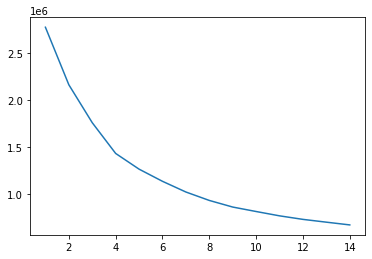

In [45]:
# Plot
import seaborn as sns
sns.lineplot(x=range(1,15), y = WSS)

### Modeling

In [52]:
# Clustering with 3 clusters
Kmeans_Model = KMeans(n_clusters=3, random_state = 123).fit(df_Clustering_Std)

In [53]:
#Clustering Output Binding

# Cluster labeling for each point
Kmeans_Model.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
# Combine cluster info with original data
df_N = pd.concat([df_Clustering, pd.Series(Kmeans_Model.labels_)], axis = 1).rename(columns = {0:'Cluster'})
df_N

In [55]:
# Cluster sizes
df_N['Cluster'].value_counts()

2.0    219405
1.0    168605
0.0      7988
Name: Cluster, dtype: int64

# Clustering Validation using Silhouette Value

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score
df_Clustering_Std2 = pd.concat([df_Clustering_Std, pd.Series(Kmeans_Model.labels_)], 
                          axis = 1).rename(columns = {0:'Cluster'}).copy()
df_Clustering_Std.head()


,CustomerID,Item_Code,InvoiceNo,Date_of_purchase,Quantity,Revenue,Shipping_Location
0,1.731641,0.618156,0.953165,0.931628,-0.196267,-0.128264,-5.371837
1,1.729246,-0.616799,0.666687,0.718529,-0.331097,-0.166196,-5.371837
2,1.729246,-0.619138,0.666687,0.780683,-0.331097,-0.140500,-5.371837
3,1.729246,2.105716,0.225031,0.327846,-0.297390,-0.139888,-5.371837
4,1.729246,0.213521,0.666687,0.762924,-0.331097,-0.136013,-5.371837


In [62]:
# Individual Row Silhouette Scores
sample_silhouette_values = silhouette_samples(df_Clustering_Std, Kmeans_Model.labels_)
df_Clustering_Std2['Silhouette_Value'] = sample_silhouette_values
df_Clustering_Std2.head()

,CustomerID,Item_Code,InvoiceNo,Date_of_purchase,Quantity,Revenue,Shipping_Location,Cluster,Silhouette_Value
0,1.731641,0.618156,0.953165,0.931628,-0.196267,-0.128264,-5.371837,2,0.099308
1,1.729246,-0.616799,0.666687,0.718529,-0.331097,-0.166196,-5.371837,2,0.073910
2,1.729246,-0.619138,0.666687,0.780683,-0.331097,-0.140500,-5.371837,2,0.076384
3,1.729246,2.105716,0.225031,0.327846,-0.297390,-0.139888,-5.371837,2,0.047265
4,1.729246,0.213521,0.666687,0.762924,-0.331097,-0.136013,-5.371837,2,0.080681


In [63]:
# Cluster-wise Silhouette Scores
df_Clustering_Std2.groupby(['Cluster'])['Silhouette_Value'].mean()

Cluster
0    0.149995
1    0.265883
2    0.312715
Name: Silhouette_Value, dtype: float64

In [ ]:
# Overall Sihouette Score
silhouette_score(df_Clustering_Std, Kmeans_Model.labels_) 